# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [372]:
import os
import pandas as pd

root_dir = 'E:/Leeds University/Machine Learning/Coursework' # this is to be defined by you 
local_path = '/datasets/COMP5611M_Assessment/' # store the related data files in this folder

data_dir = root_dir + local_path
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [373]:
#Importing the required libraries for analysis 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Reading the training data file and storing it in a dataframe & Printing the first five rows of the training data. 
df_train = pd.read_csv(training_data_path)
df_train.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


In [374]:
#Reading the file having training data with target variable and storing it in a dataframe.
df_target = pd.read_csv(training_targets_path)
#Printing the first five rows of the training data using head() function.
df_target.head()

,TARGET_deathRate
0,199.5
1,137.1
2,126.9
3,173.8
4,179.8


In [375]:
#Exploring basic statistical summary of the data
df_train.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,...,1955.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,598.332717,183.716981,447.878346,47076.404430,1.014432e+05,16.842535,155.768343,45.622518,39.596555,42.164807,...,48.418210,41.193027,36.222600,19.190484,83.624709,9.015025,1.243579,2.005053,51.292494,5.636188
std,1288.683525,456.439174,54.971289,11842.157129,2.900244e+05,6.350803,535.341101,46.660730,5.279995,5.343116,...,9.999573,9.441849,7.694826,5.992297,16.420867,14.372832,2.584031,3.558472,6.531800,1.989878
min,6.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,74.250000,28.000000,420.100000,39047.250000,1.170600e+04,12.200000,0.000000,37.725000,36.325000,39.100000,...,41.000000,34.400000,30.900000,14.900000,76.994471,0.620614,0.254560,0.296552,47.823118,4.540686
50%,169.000000,61.000000,453.549422,45265.000000,2.578800e+04,15.800000,0.000000,41.000000,39.600000,42.400000,...,48.600000,41.100000,36.400000,18.800000,90.157076,2.231131,0.543719,0.843838,51.704554,5.355555
75%,522.750000,149.000000,480.375000,52489.500000,6.851450e+04,20.400000,83.907210,44.100000,42.700000,45.400000,...,55.500000,47.700000,41.600000,23.000000,95.409859,10.189792,1.204151,2.219736,55.397599,6.457891
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.400000,9762.308998,619.200000,64.700000,65.700000,...,78.200000,70.700000,65.100000,46.600000,100.000000,85.947799,37.156932,41.930251,71.703057,21.326165


In [376]:
#Understanding the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

According to the aforementioned information, our cancer mortality train data consists of 2438 records with 31 different attributes, and all of our values are of the numerical data type. We also have no categorical variables.

In [377]:
#Analyzing the dataset for any missing values
df_train.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
dtype: i

We have missing data in three columns ('PctSomeCol18_24,'PctEmployed16_Over,' and 'PctPrivateCoverageAlone'). The maximum number of missing data is 1829 in the 'PctSomeCol18 24' column. It is critical to address these missing values. These values will be handled later in the analysis.

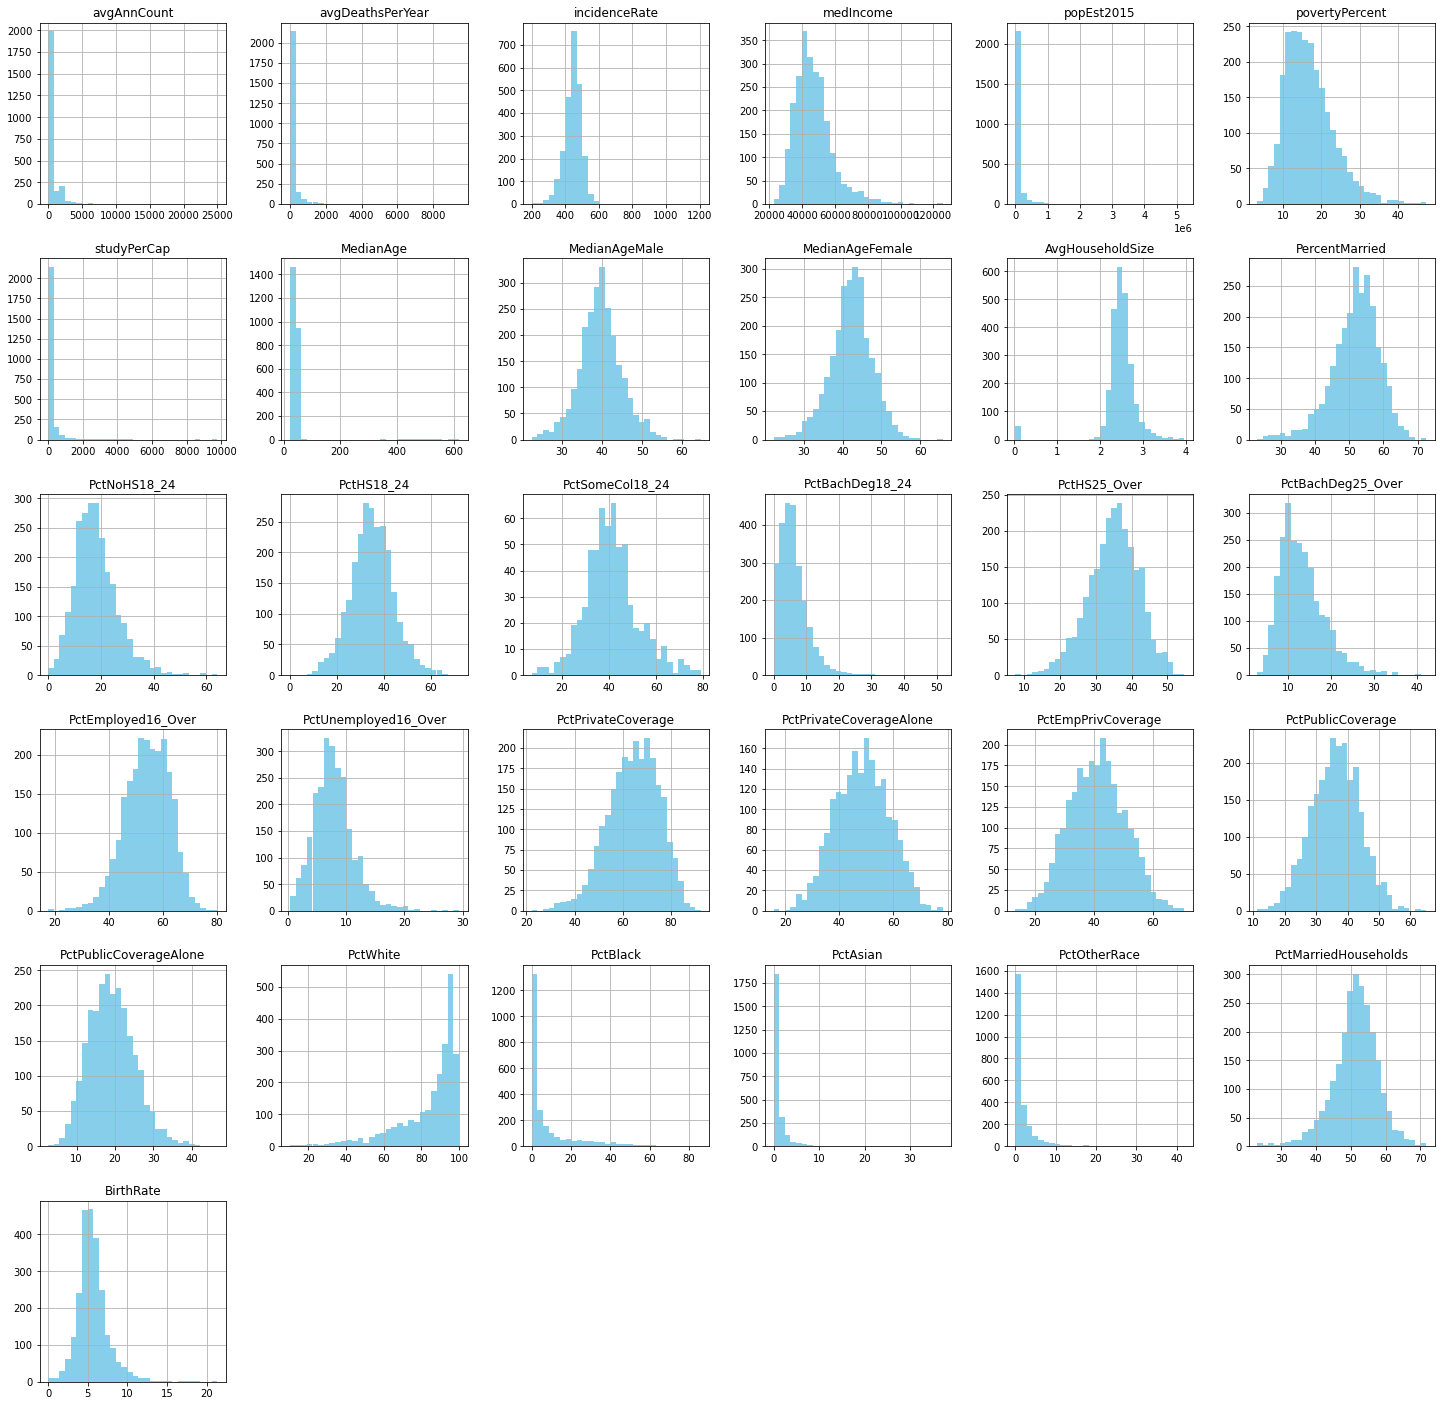

In [378]:
#All of the features plotted as a histogram
df_train.hist(bins=30,figsize=(25,25),color='skyblue');

In [379]:
print("People with age above 100 years:", len(df_train[df_train['MedianAge'] >=100]))
print("People with age above 200 years:", len(df_train[df_train['MedianAge'] >=200]))

People with age above 100 years: 26
People with age above 200 years: 26


#### The observations from the histogram plot

Most of the features are normally distributed but some of them are either positively or negatively skewed. A data point that differs significantly from other observations is called an outlier. An outlier could be caused by measurement variability or imply experimental mistake. The isolated bars in histograms can be used to find outliers in our data.

The describe function is another way to find outliers. Outliers are sensitive to the mean, but the maximum value is an outlier if the mean is extremely small in compared to it.

Following obervations could be made from histogram plot:
- If we look at the values of the feature MedianAge closely, we can see that there are 26 entries with an age of more than 200 years. People who live to reach 200 years old are considered outliers since such occurrences are extremely rare.
- The data is either significantly skewed or normally distributed in the dataset.
- Outliers are noticeable from isolated bars in features like **studyPerCap, MedianAge, and AvgHouseholdSize.**
- In addition, the mean and median data for **medIncome, avgAnnCount, avgDeathsPerYear, PctBlack, studyPerCap, popEst2015,  PctAsian, PctWhite, and PctOtherRace** all significantly varied, indication of the presence of outliers.
- Column **studyPerCap** has the highest number zero values and is extremely skewed around it.
- The data is extremely skewed for features **PctBlack, PctWhite, PctAsian, avgAnnCount, avgDeathsPerYear, popEst2015, studyPerCap, and PctOtherRace.**

##### Correlation of predictor variables with the target variable

In [380]:
#Merging the dataset to estimate the correlation of all the predictor variables with the target variable.
merged_df = pd.concat([df_train, df_target],axis=1, join='inner')
correlated_features = merged_df.drop("TARGET_deathRate", axis=1).apply(lambda x: x.corr(merged_df.TARGET_deathRate))

#Arranging the features according to the degree of the correlation with the target variable, as measured by absolute values.
correlated_features_sort = correlated_features.sort_values(ascending=False,key=abs)
display(pd.DataFrame(correlated_features_sort))

,0
PctBachDeg25_Over,-0.491411
incidenceRate,0.443983
PctPublicCoverageAlone,0.439734
medIncome,-0.416607
povertyPercent,0.413260
PctHS25_Over,0.409915
PctEmployed16_Over,-0.400317
PctPublicCoverage,0.391899
PctPrivateCoverage,-0.382786
PctUnemployed16_Over,0.362612


Magnitude of the correlation values are used to find highly correlated features.

#### Features with strong positive correlation with the Target Variable:
- povertyPercent
- PctHS25_Over
- incidenceRate
- PctPublicCoverageAlone

#### Features with  weak correlation with the Target Variable:
- studyPerCap
- MedianAgeFemale
- MedianAge

#### Features with strong negative correlation with the Target Variable:
- PctBachDeg25_Over
- medIncome
- PctEmployed16_Over



In [381]:
#Identifying the Top 5 features with strongest correlations to the targets
#In order to indentify them we will use the absolute values
corr_features = correlated_features_sort.head()
display(pd.DataFrame(corr_features))

,0
PctBachDeg25_Over,-0.491411
incidenceRate,0.443983
PctPublicCoverageAlone,0.439734
medIncome,-0.416607
povertyPercent,0.413260


#### The top five features that are highly correlated with the target variable(TARGET_deathRate):
- PctPublicCoverageAlone
- medIncome
- povertyPercent
- PctBachDeg25_Over 
- incidenceRate



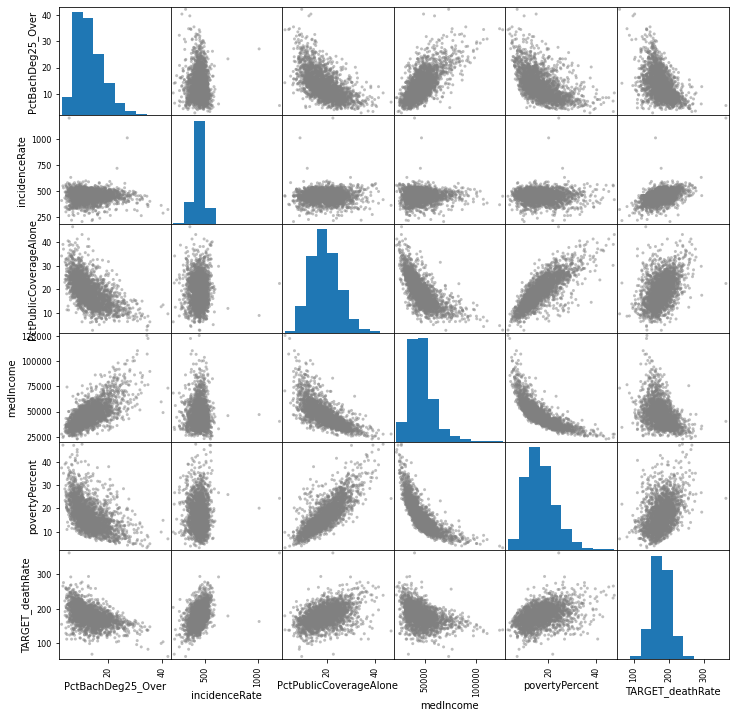

In [382]:
#Scatter Matrix Plot
pd.plotting.scatter_matrix(combined_df[['PctBachDeg25_Over','incidenceRate','PctPublicCoverageAlone','medIncome','povertyPercent','TARGET_deathRate']],figsize=(12,12),color='grey');


In [383]:
merged_df[['PctBachDeg25_Over','incidenceRate','PctPublicCoverageAlone','medIncome','povertyPercent','TARGET_deathRate']].corr()

,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,medIncome,povertyPercent,TARGET_deathRate
PctBachDeg25_Over,1.000000,-0.024455,-0.599208,0.691206,-0.519242,-0.491411
incidenceRate,-0.024455,1.000000,0.023177,0.019830,-0.010297,0.443983
PctPublicCoverageAlone,-0.599208,0.023177,1.000000,-0.709009,0.791595,0.439734
medIncome,0.691206,0.019830,-0.709009,1.000000,-0.784652,-0.416607
povertyPercent,-0.519242,-0.010297,0.791595,-0.784652,1.000000,0.413260
TARGET_deathRate,-0.491411,0.443983,0.439734,-0.416607,0.413260,1.000000


The correlation of all of the above-mentioned features was shown using the scatter matrix. However, only a few features have a strong correlation with each other.

- With a correlation coefficient of -0.78, **povertyPercent** and **medIncome** have a high negative correlation. This suggests that these two are inversely related.
- With a correlation coefficient of 0.79, **povertyPercent** and **PctPublicCoverageAlone** have a high positive correlation. This shows that these two variables have a direct relationship.

As a result, we can predict that as the percentage of the population living in poverty rises, so will the percentage of county residents who rely solely on government-provided health care and the median income of the county.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

- Columns PctPrivateCoverageAlone, PctSomeCol18_24 and PctEmployed16_Over have loads of missing values. If we look at our data closely, we can see that the total proportion of county residents who #attained highest education(PctNoHS18_24, PctHS18_24, PctSomeCol18_24, PctBachDeg18_24) between the ages of 18 and 24 should be 0.

- The missing values for column PctSomeCol18_24 were calculated using this approach.

- The missing values in the other two columns: PctEmployed16 Over, PctPrivateCoverageAlone, were substituted with the column's median values. As a result, imputation is done using the "median" technique. 

- We developed a class to execute this change, which was then called in the pipeline we made. The columns are then scaled using StandardScaler ().

In [384]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.pipeline import FeatureUnion

#Defining a class to compute missing values on PctSomeCol18_24
class HandlingMissingValue():
    def _init_(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        for i, row in X.iterrows():
            if(pd.isnull(row["PctSomeCol18_24"])):
                X.loc[i, 'PctSomeCol18_24'] = 100.0 - row['PctNoHS18_24'] - row['PctHS18_24'] - row['PctBachDeg18_24']
        return X        

    def fit(self, X, y=None):
        return self  

#Creating a pipeline
PipelineCancer = Pipeline([
    ('missingvalues', HandlingMissingValue()),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

#Scaling the training data using fir_transform() & exploring the scaling parameters
PipelineCancerTransform = PipelineCancer.fit_transform(df_train)
PipelineCancerTransform.shape

(2438, 31)

In [385]:
#Dataframe to store transformed data
PipelineCancerTransformed = pd.DataFrame(PipelineCancerTransform, columns = df_train.columns )
PipelineCancerTransformed.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.418600,-0.336843,-0.792910,-1.106563,-0.321391,0.576024,-0.29103,0.121701,2.122302,1.822380,...,0.016283,-1.609446,1.751848,0.235270,0.795452,-0.596862,-0.449266,-0.487014,0.097040,-0.298950
1,-0.375912,-0.312739,-0.802008,0.024206,-0.271554,-0.479177,-0.29103,-0.103374,0.038539,0.100185,...,0.898725,0.593965,-0.600865,-1.033286,0.528141,-0.481019,-0.245376,-0.316471,-0.052515,0.348572
2,-0.438780,-0.378479,-1.744511,2.546139,-0.315708,-1.581626,-0.29103,-0.161250,-0.510816,-0.442680,...,1.892868,1.388463,-2.342652,-1.767712,0.734930,-0.627355,-0.278579,-0.530235,2.027370,-0.245321
3,-0.267252,-0.183451,-0.332575,2.835673,-0.181191,-1.471381,-0.29103,-0.045498,0.587895,0.362259,...,1.758826,1.526177,-0.964820,-0.949828,0.364385,-0.111874,-0.144458,-0.436916,1.692375,-0.004386
4,-0.406182,-0.332461,-0.734686,-0.357897,-0.273096,-0.353183,-0.29103,-0.311300,-1.780017,-1.977680,...,0.250856,0.562185,-1.224788,-0.182018,-0.245879,-0.422155,2.802006,1.020883,1.793664,2.412845


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [386]:
#Step 1: We'll split the data into two sets: training and testing. For that we can use train_test_split() function.
#Step 2: We'll create various models and fit them to our training data.
#Step 3: We will find the best fit by performing performing validation on the testing dataset. 

from sklearn.model_selection import train_test_split

TrainDataX,TestDataX,TrainDataY,TestDataY  = train_test_split(PipelineCancerTransformed, df_target['TARGET_deathRate'], test_size= 0.3, 
                                                  random_state=40)

In [387]:
#first five rows of the training data - input
TrainDataX.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1926,-0.394540,-0.325887,-0.403536,0.669914,-0.297195,-1.156396,-0.291030,-0.039067,0.455292,0.643051,...,0.507770,0.689304,-0.587866,-0.799604,0.830417,-0.616631,-0.458984,-0.321718,0.381643,-0.294077
73,-0.401525,-0.314930,0.318807,-0.250462,-0.298768,0.292537,-0.291030,-0.079795,0.379519,0.100185,...,-0.095418,-0.094601,0.542996,0.485642,0.368370,-0.612571,-0.481354,-0.453779,0.558862,-1.204139
2060,0.374620,0.401632,0.782781,0.562225,0.382256,-0.179941,0.175433,-0.195548,-0.757079,-0.873229,...,0.686492,0.382098,-0.561869,-0.298859,0.112416,-0.566065,1.037963,0.118285,-0.493647,-0.584680
2313,-0.382898,-0.308356,-0.128791,-0.828854,-0.276962,1.804467,-0.291030,-0.141958,-0.491873,-0.105729,...,-0.888499,-0.995033,0.594989,1.119920,-1.763654,1.867417,-0.423279,1.228740,-1.128732,1.365708
1888,-0.423257,-0.360948,2.089185,-1.521099,-0.326537,1.725721,-0.291030,-0.017631,0.909931,0.530734,...,-1.558707,-1.185713,1.257908,1.153303,0.683346,-0.420845,-0.378999,-0.563575,-0.245369,-1.412341


In [388]:
#first five rows of the training data - Output
TrainDataY.head()

1926    159.2
73      227.4
2060    163.3
2313    183.2
1888    185.7
Name: TARGET_deathRate, dtype: float64

### Linear Regression

In [389]:
#Linear Regression on training data
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(TrainDataX, TrainDataY)

LinearRegression()

In [390]:
#Here, the first five records are taken, fed into the model, and the predicted values are printed alongside the actual values
#for comparison.
TempData = df_train.iloc[:5]
LabelTempData = df_target['TARGET_deathRate'].iloc[:5]
LabelTempDataTransformed = PipelineCancer.transform(TempData)


PredLab=pd.DataFrame(list(zip(LR.predict(LabelTempDataTransformed), list(LabelTempData))),
                  columns = ['Predictions', 'Labels'])
display(PredLab.head(10).style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'black',                       
                                    'border-color': 'black'}))

,Predictions,Labels
0,179.479548,199.500000
1,151.444507,137.100000
2,143.678032,126.900000
3,146.799711,173.800000
4,162.097599,179.800000


In [391]:
#Importing necessary libraries from sklearn & numpy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

#Using a test data set and linear regression to predict values for the target variable
LRPred = LR.predict(TestDataX)

#RMSE, MSE, MAE and R-squared values of the model.

#MSE
LR_MSE = mean_squared_error(TestDataY, LRPred)
#RMSE
LR_RMSE = np.sqrt(LR_MSE)
#R-squared
LR_RSQ = r2_score(TestDataY, LRPred)
#MAE
LR_MAE = mean_absolute_error(TestDataY, LRPred)

#metrics results
display(pd.DataFrame({'Metric':['Root Mean-squared Error','R-squared Error','Mean Absolute Error'], 'Value':[LR_RMSE,LR_RSQ,LR_MAE]}))

,Metric,Value
0,Root Mean-squared Error,18.716896
1,R-squared Error,0.535449
2,Mean Absolute Error,14.174497


In [392]:
#We will use MSE, MAE, and R-squared to evaluate the model 
from sklearn.model_selection import cross_val_score


ScoreConfig = ["neg_mean_squared_error","neg_mean_absolute_error","r2"]

for i in range(len(ScoreConfig)):
    ScoreVal = cross_val_score(LR, TrainDataX, TrainDataY, scoring=ScoreConfig[i], cv = 10)
    print("Mean of ", ScoreConfig[i], "is :" ,abs(ScoreVal.mean()))
    print("Std Deviation of ", ScoreConfig[i], "is :" ,ScoreVal.std())

Mean of  neg_mean_squared_error is : 390.15008327734944
Std Deviation of  neg_mean_squared_error is : 39.15023187873802
Mean of  neg_mean_absolute_error is : 14.448388036953506
Std Deviation of  neg_mean_absolute_error is : 0.8584608499733059
Mean of  r2 is : 0.47615962693897834
Std Deviation of  r2 is : 0.061188305953638035


### Lasso Regression

In [393]:
#Importing libraries from sklearn for Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RepeatedKFold


#Using repeated k-fold cross-validation, a machine learning model's projected performance can be improved.
#use the cross-validation procedure several times and average the results over all folds and runs.
#Here, we will split the data into 10 folds and repeat the process 5 times, with a 2 random state.
RKfolds = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2)

#We construct a search space of viable values for Grid Search, within which the hyperparameter will be selected based
#on its effective error minimization. To identify the proper regularisation weights, or alpha, we will first randomly 
#generate numbers in the range of 0.01 to 5 using linespace. 
ValuesOfAlpha = np.linspace(start = 0.01, stop=5, num=500)
ParameterGrid = {'alpha': ValuesOfAlpha}

#Lasso Model
LassoModel=Lasso()

#Run Grid Search on the hyperparameters, with the metric criteria set to a negative RMSE value. 
#The RMSE is the most generally used evaluation metric for determining how well a regression model can 
#predict the value of a response variable in absolute terms.
LassoGridSearch = GridSearchCV(LassoModel, ParameterGrid, cv=RKfolds,scoring='neg_root_mean_squared_error',
                             return_train_score=True,verbose=1)

#search on training data
LassoFit = LassoGridSearch.fit(TrainDataX, TrainDataY)

Fitting 50 folds for each of 500 candidates, totalling 25000 fits


In [394]:
#Model Summary of the best alpha value and best score of the model
display(pd.DataFrame({'Type':['Best Alpha ','Best Model Score'], 'Value':[LassoFit.best_estimator_.alpha,-1*LassoFit.best_score_]}))

,Type,Value
0,Best Alpha,0.05000
1,Best Model Score,19.62069


In [395]:
#Fitting Lasso Regression model with best hyperparamter value 
LassoRegression = Lasso(alpha=LassoGridSearch.best_params_['alpha'])
LassoRegression.fit(TrainDataX, TrainDataY)


#Predicting the value of target variable using Lasso Regression
LassoPrediction = LassoRegression.predict(TestDataX)
#RMSE value
LassoRMSE=np.sqrt(LassoMSE)
#MSE value
LassoMSE=mean_squared_error(TestDataY, LassoPrediction)
#MAE value
LassoMAE = mean_absolute_error(TestDataY, LassoPrediction)
#R-squared value
LassoRSQ = r2_score(TestDataY, LassoPrediction)

#metrics results
display(pd.DataFrame({'Metric':['Root Mean-squared Error','R-squared Error','Mean Absolute Error'], 'Value':[LassoRMSE,LassoRSQ,LassoMAE]}))

,Metric,Value
0,Root Mean-squared Error,19.084296
1,R-squared Error,0.536085
2,Mean Absolute Error,14.196255


In [396]:
#We will use MSE, MAE, and R-squared to evaluate the model's performance
ScoreConfig = ["neg_mean_squared_error","neg_mean_absolute_error","r2"]

for i in range(len(ScoreConfig)):
    ScoreVal = cross_val_score(LassoRegression, TrainDataX, TrainDataY, scoring=ScoreConfig[i], cv = 10)
    print("Mean of ", ScoreConfig[i], "is :" ,abs(ScoreVal.mean()))
    print("Std Deviation of ", ScoreConfig[i], "is :" ,ScoreVal.std())

Mean of  neg_mean_squared_error is : 388.32722280023603
Std Deviation of  neg_mean_squared_error is : 38.77534582802596
Mean of  neg_mean_absolute_error is : 14.44346944116152
Std Deviation of  neg_mean_absolute_error is : 0.8808338135457181
Mean of  r2 is : 0.4790388137913518
Std Deviation of  r2 is : 0.056870891606430586


### Ridge Regression

In [397]:
#Importing libraries from sklearn required to use Ridge Regression
from sklearn.linear_model import Ridge

#Using repeated k-fold cross-validation, a machine learning model's projected performance can be improved.
#use the cross-validation procedure several times and average the results over all folds and runs.
#Here, we will split the data into 10 folds and repeat the process 3 times, with a 1 random state.
RKfolds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#We construct a search space of viable values for Grid Search, within which the hyperparameter will be selected based
#on its effective error minimization. To identify the proper regularisation weights, or alpha, we will first randomly 
#generate numbers in the range of 0.01 to 50 using linespace. 
ValuesOfAlpha = np.linspace(start=0, stop=50, num=100)
ParameterGrid = {'alpha': ValuesOfAlpha}

#Ridge Model
RidgeModel = Ridge()

#Run Grid Search on the hyperparameters, with the metric criteria set to a negative RMSE value. 
#The RMSE is the most generally used evaluation metric for determining how well a regression model can 
#predict the value of a response variable in absolute terms.
RidgeGridSearch = GridSearchCV(RidgeModel, ParameterGrid, cv=RKfolds,scoring='neg_root_mean_squared_error',
                             return_train_score=True,verbose=1)
RidgeFit = RidgeGridSearch.fit(TrainDataX, TrainDataY)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [398]:
#Model Summary of the best alpha value and best score of the model
display(pd.DataFrame({'Type':['Best Alpha ','Best Model Score'], 'Value':[RidgeFit.best_params_,-1*RidgeFit.best_score_]}))

,Type,Value
0,Best Alpha,{'alpha': 28.282828282828284}
1,Best Model Score,19.631176


In [399]:
#Fitting Ridge Regression model with best hyperparamter value 
RidgeRegression = Ridge(alpha=RidgeGridSearch.best_params_['alpha'])
RidgeRegression.fit(TrainDataX, TrainDataY)

##Predicting the value of target variable using Ridge Regression
RidgePrediction = RidgeRegression.predict(TestDataX)

#RMSE value
RidgeRMSE=np.sqrt(RidgeMSE)

#MSE value
RidgeMSE = mean_squared_error(TestDataY, RidgePrediction)

#R-squared value
RidgeRSQ = r2_score(TestDataY, RidgePrediction)

#MAE value
RidgeMAE = mean_absolute_error(TestDataY, RidgePrediction)

#metrics results
display(pd.DataFrame({'Metric':['Root Mean-squared Error','R-squared Error','Mean Absolute Error'], 'Value':[RidgeRMSE,RidgeRSQ,RidgeMAE]}))

,Metric,Value
0,Root Mean-squared Error,19.115531
1,R-squared Error,0.534827
2,Mean Absolute Error,14.223063


### Performance of the model

In [414]:
PerformanceMatrix= pd.DataFrame({'Regression Model':['OLS','Lasso','Ridge'], 'RMSE Value':[LR_RMSE,LassoRMSE,RidgeRMSE],
                     'RSQ Value':[LR_RSQ,LassoRSQ,RidgeRSQ]})

PerformanceMatrix

,Regression Model,RMSE Value,RSQ Value
0,OLS,18.716896,0.535449
1,Lasso,19.084296,0.536085
2,Ridge,19.115531,0.534827


The RMSE and R-squared measures how well a linear regression model fits a set of data. The RMSE indicates how effectively a regression model can predict the value of a response variable in absolute terms, whereas the R- Squared indicates how well the predictor variables can explain variation in the response variable. As a result, we use RMSE and R-squared values to choose the best performing model, with the lowest RMSE values and the greatest R-squared values.

The Lasso model, with the lowest **RMSE Score of 19.084** and the highest **R-squared value of 0.5360**, is our top performing model in this case, according to the above score matrix.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [401]:
#Lasso regression and the best regularisation weight achieved in Exercise 3 is used to fit our data.
LassoModel = Lasso(alpha=LassoGridSearch.best_params_['alpha'], fit_intercept = True, random_state = 1142, max_iter=5000)
LassoModel.fit(TrainDataX,TrainDataY)

Lasso(alpha=0.05, max_iter=5000, random_state=1142)

In [402]:
#Obtaining the values of the Lasso regression coefficients in order to determine the important characteristics. 
#We'll keep the absolute values and then sort them because the relevance of a feature is determined by its coefficient's 
#absolute value in order of decreasing significance
LassoCoefficient = abs(LassoModel.coef_)
LassoFeatureImportance=pd.DataFrame(sorted(sorted(zip(LassoCoefficient,df_train.columns), reverse=True),reverse =True),
                  columns = ['Lasso Regression Coefficient', 'Attributes'])
print(pd.DataFrame(sorted(sorted(zip(LassoCoefficient,df_train.columns), reverse=True),reverse =True),
                  columns = ['Lasso Regression Coefficient', 'Attributes']))


    Lasso Regression Coefficient               Attributes
0                      10.213358            incidenceRate
1                       7.291468        PctBachDeg25_Over
2                       6.480754     PctMarriedHouseholds
3                       5.715883           PercentMarried
4                       5.678001       PctPrivateCoverage
5                       4.953559         avgDeathsPerYear
6                       4.419121        PctPublicCoverage
7                       3.754604               popEst2015
8                       3.415591   PctPublicCoverageAlone
9                       3.368660       PctEmployed16_Over
10                      3.198538             PctOtherRace
11                      2.752422             PctHS25_Over
12                      2.426932                 PctWhite
13                      2.128090                 PctBlack
14                      2.085289               PctHS18_24
15                      2.001839                BirthRate
16            

In [403]:
LassoFeatureImportance[:5]

,Lasso Regression Coefficient,Attributes
0,10.213358,incidenceRate
1,7.291468,PctBachDeg25_Over
2,6.480754,PctMarriedHouseholds
3,5.715883,PercentMarried
4,5.678001,PctPrivateCoverage


#### The following are the top five relevant features found using Lasso Regression:
- PercentMarried
- PctPrivateCoverage
- PctMarriedHouseholds
- incidenceRate
- PctBachDeg25_Over

From the data above, the most crucial parameter for forecasting cancer mortality rates is the mean per capita cancer diagnoses. The percentage of county residents who are married and have children, as well as the number of people with private health insurance, all have a significant impact on the rate.

From the coefficients we can conclude that there are 3 features with least significance. Hence, We can ignore these following features:
- PctSomeCol18_24,
- PctBachDeg18_24,
- MedianAgeFemale



# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [404]:
from sklearn.ensemble import RandomForestRegressor

RF_Regression=RandomForestRegressor()

ParameterGrid  = [{'n_estimators': [3, 10, 30, 60, 100, 200],'max_features':[2, 4, 6, 8, 10, 15, 20]}, 
               {'bootstrap': [False],'n_estimators':[2, 8, 12, 20, 40],'max_features':[4,8,10, 12, 15]}]

RFGridSearch = GridSearchCV(RF_Regression, ParameterGrid, cv=10,scoring='neg_mean_squared_error')
RFGridSearch.fit(TrainDataX,TrainDataY)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 15, 20],
                          'n_estimators': [3, 10, 30, 60, 100, 200]},
                         {'bootstrap': [False],
                          'max_features': [4, 8, 10, 12, 15],
                          'n_estimators': [2, 8, 12, 20, 40]}],
             scoring='neg_mean_squared_error')

For **'n estimator'** and **'max features'**, we use the grid search technique. The optimal number of max features is 15, and the optimal number of n estimator is 200, which will be utilised to further train the model.

In [405]:
RFGridSearch.best_estimator_

RandomForestRegressor(max_features=15, n_estimators=200)

In [406]:
RFFeatures = RFGridSearch.best_params_['max_features']
RFEstimator = RFGridSearch.best_params_['n_estimators']

print("Optimum value of max features:",RFFeatures)
print("Optimum value of estimators:",RFEstimator)

Optimum value of max features: 15
Optimum value of estimators: 200


In [407]:
RFRegression = RandomForestRegressor(max_features = RFFeatures, n_estimators = RFEstimator, 
                                               random_state=120)
RFRegression.fit(TrainDataX, TrainDataY)

RFPrediction = RFRegression.predict(TestDataX)

display(pd.DataFrame({'Metric':['Root Mean-squared Error','R-squared Error','Mean Absolute Error'], 'Value':[round(np.sqrt(mean_squared_error(TestDataY, RFPrediction)),4),round(r2_score(TestDataY, RFPrediction),4),round(mean_absolute_error(TestDataY, RFPrediction),4)]}))


,Metric,Value
0,Root Mean-squared Error,18.4124
1,R-squared Error,0.5504
2,Mean Absolute Error,13.7955


#### Lasso and Random Forest Regression Model comparison:

The R-squared value for the **Random Forest Regression model** is **0.5504**, however it is **0.5360** for **Lasso Regression**, which is lower than the R-squared value for the Random Forest Regression model. Random Forest Regression and Lasso Regression models, on the other hand, have RMSE values of **18.4124** and **19.0842**, respectively. Random Forest Regression produces a lower RMSE than Lasso Regression. As a result of its low RMSE and higher R-squared values, we may conclude that the Random Forest Regression model is the best fit for our data.

#### Most Significant features

In [408]:
RFFeatureImp = RFGridSearch.best_estimator_.feature_importances_
attrb = list(df_train)

RFFeaturesSorted = sorted(zip(RFFeatureImp,attrb),reverse=True)
RFFeaturesSorted[:5]


display(pd.DataFrame(RFFeaturesSorted,
                  columns = ['Value', 'Attributes'])[:5])

,Value,Attributes
0,0.171095,incidenceRate
1,0.119384,PctBachDeg25_Over
2,0.065204,PctPublicCoverageAlone
3,0.064125,PctHS25_Over
4,0.061337,medIncome


In [409]:
#Top 5 features obtained by lasso Regression
LassoFeatureImportance[:5]

,Lasso Regression Coefficient,Attributes
0,10.213358,incidenceRate
1,7.291468,PctBachDeg25_Over
2,6.480754,PctMarriedHouseholds
3,5.715883,PercentMarried
4,5.678001,PctPrivateCoverage


##### Most significant features obtained using Lasso Regression are:
- PctMarriedHouseholds
- PercentMarried
- PctPrivateCoverage
- incidenceRate
- PctBachDeg25_Over

##### Most significant features obtained using Random Forest Regression are:
- PctPublicCoverageAlone
- PctHS25_Over
- povertyPercent
- incidenceRate
- PctBachDeg25_Over


The importance of a variable is determined by how frequently it is used by a model to make accurate predictions. The more a model relies on a variable for prediction, the more important that variable becomes. We may conclude from the preceding that **incidenceRate** and **PctBachDeg25_Over** are the most essential features in defining the target variable, since we acquired these features with the greatest coefficient values in both models built. However, the remaining three are distinct from one another, which could be due to the fact that regression models operate or execute differently on our data.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [410]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: LR = LinearRegression()
# LR.fit(TrainDataX,TrainDataY) where TrainDataX and TrainDataY is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions


# Statistical summary of the data
test_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,...,23.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1663.588923,597.266667,447.504981,49631.033333,4.066770e+05,16.123333,261.141015,39.753333,38.496667,40.996667,...,52.286957,43.286667,34.093333,18.343333,84.058404,10.180126,1.537485,1.722252,50.695571,5.052973
std,6908.107487,2537.466167,47.267166,13129.195262,1.845798e+06,6.136700,799.333401,4.952515,4.827470,5.108309,...,9.727295,8.063102,8.572769,6.450164,15.996993,14.396430,2.617164,3.625120,6.077931,1.715301
min,34.000000,21.000000,364.100000,31176.000000,5.306000e+03,6.800000,0.000000,30.000000,29.100000,30.700000,...,35.300000,28.700000,13.500000,5.500000,45.568170,0.274005,0.000000,0.000000,37.828645,1.745232
25%,103.500000,38.000000,409.150000,43738.500000,1.947000e+04,11.600000,0.000000,37.750000,35.725000,38.025000,...,47.450000,39.475000,29.575000,13.775000,73.173660,0.578244,0.381877,0.225539,46.369610,4.018707
50%,180.000000,72.500000,450.074711,48050.000000,3.105500e+04,15.450000,22.786103,39.500000,38.100000,41.550000,...,51.200000,42.000000,36.200000,19.050000,93.475217,1.590742,0.754726,0.717143,50.401315,4.761180
75%,730.750000,231.500000,477.850000,50981.500000,1.187760e+05,20.000000,88.748667,43.025000,41.600000,44.400000,...,57.500000,47.750000,38.575000,22.075000,95.967752,14.832857,1.732712,1.592466,55.289844,6.367358
max,38150.000000,14010.000000,529.500000,92560.000000,1.017029e+07,32.500000,4260.367794,52.800000,51.200000,53.600000,...,72.800000,60.900000,47.100000,29.600000,98.236002,50.851000,14.129380,19.591522,63.775400,8.150028


In [411]:
#Exploring null values in the data.
test_data.isna().sum()

avgAnnCount                 0
avgDeathsPerYear            0
incidenceRate               0
medIncome                   0
popEst2015                  0
povertyPercent              0
studyPerCap                 0
MedianAge                   0
MedianAgeMale               0
MedianAgeFemale             0
AvgHouseholdSize            0
PercentMarried              0
PctNoHS18_24                0
PctHS18_24                  0
PctSomeCol18_24            27
PctBachDeg18_24             0
PctHS25_Over                0
PctBachDeg25_Over           0
PctEmployed16_Over          2
PctUnemployed16_Over        0
PctPrivateCoverage          0
PctPrivateCoverageAlone     7
PctEmpPrivCoverage          0
PctPublicCoverage           0
PctPublicCoverageAlone      0
PctWhite                    0
PctBlack                    0
PctAsian                    0
PctOtherRace                0
PctMarriedHouseholds        0
BirthRate                   0
dtype: int64

In [412]:
#Random forest model turns out to be the best model.
RF = RandomForestRegressor(max_features = RFFeatures, n_estimators = RFEstimator)

In [413]:
#Testing model on a set of training data.
TrainDataX = PipelineCancer.transform(df_train)
TrainDataY = df_target
RF.fit(TrainDataX,TrainDataY) 


TestDataX = PipelineCancer.transform(test_data)
predictions = LR.predict(TestDataX)

#MSE value
FinalModelMSE = mean_squared_error(test_targets, predictions)

#RMSE value
FinalModelRMSE = np.sqrt(FinalModelMSE)

#MAE value
FinalModelMAE = mean_absolute_error(test_targets, predictions)

#R-squared value
FinalModelRSQ = r2_score(test_targets, predictions)

#metric results of Random Forest
display(pd.DataFrame({'Metric':['Root Mean-squared Error','R-squared Error','Mean Absolute Error'], 'Value':[FinalModelRMSE,FinalModelRSQ,FinalModelMAE]}))



,Metric,Value
0,Root Mean-squared Error,23.204182
1,R-squared Error,0.288319
2,Mean Absolute Error,17.308303


On testing data, the best performing model, Random Forest Regression, is chosen. The model was first trained on complete training data, and then tested to predict the value for the target variable. The following are the outcomes:
- RMSE Score: 23.2041
- MAE Score: 17.3083
- R-Squared: 0.2883